In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # ths for developing things to ignore warnings

warnings.filterwarnings('ignore') #If any warning appears ignore it.

In [ ]:
df=pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


1st STEP : EDA(Exploratory Data Analysis)

In [ ]:
df.shape # To check shape of data,
#We have to predict charges in this table

(1338, 7)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()  #Statistical analysis of data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()  # It will check that is there any null values in a specific column

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

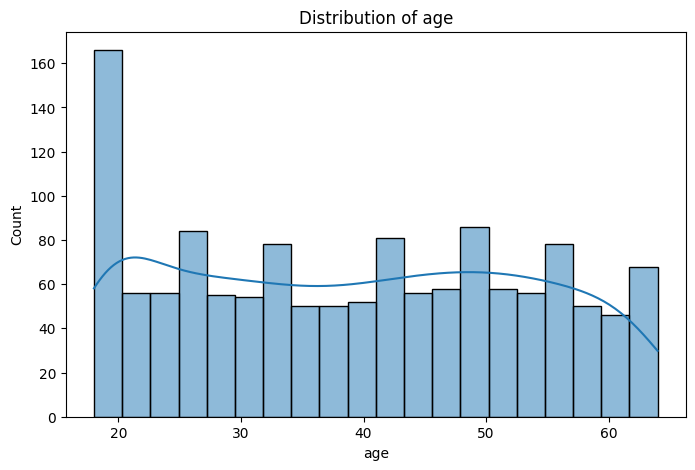

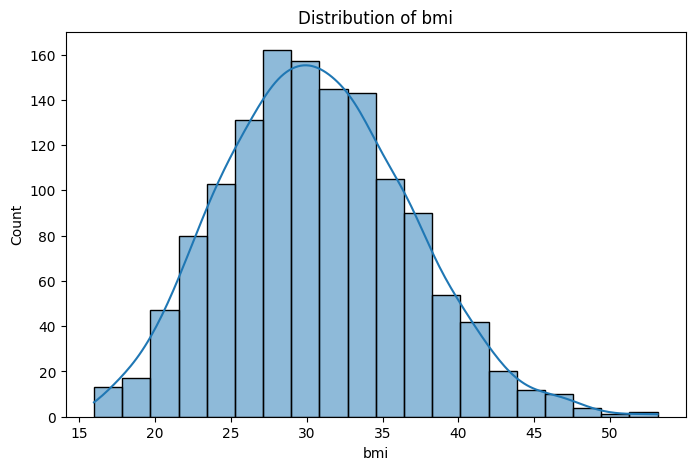

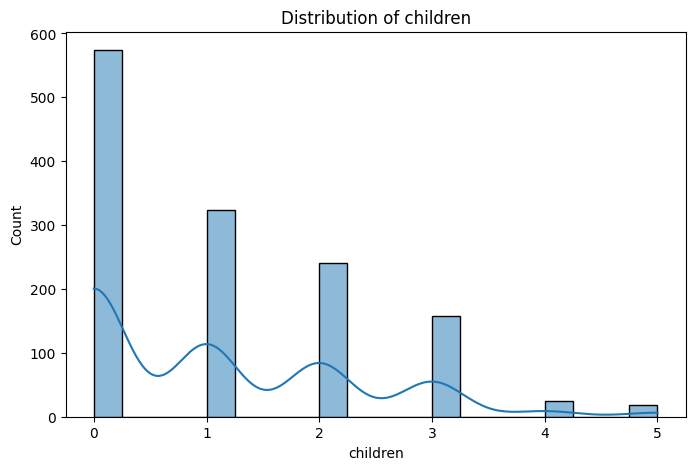

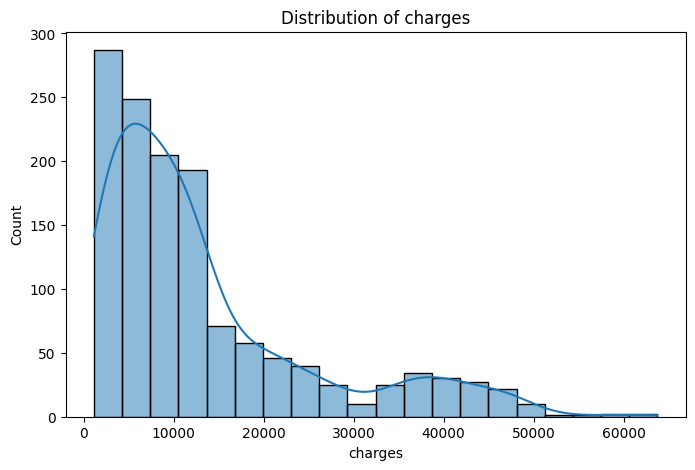

In [ ]:
numeric_columns=['age', 'bmi', 'children', 'charges']  # only numeric columns
for col in numeric_columns:
  plt.figure(figsize=(8,5))  #800*500 pixel
  plt.title(f'Distribution of {col}')
  sns.histplot(df[col],bins=20, kde= True) #kde = kernel density curve
  plt.show()

Since from data we can interpret that mostly are teenager of age 20-25 , so insurance cahrges are maximum on lower age group side

<Axes: xlabel='children', ylabel='count'>

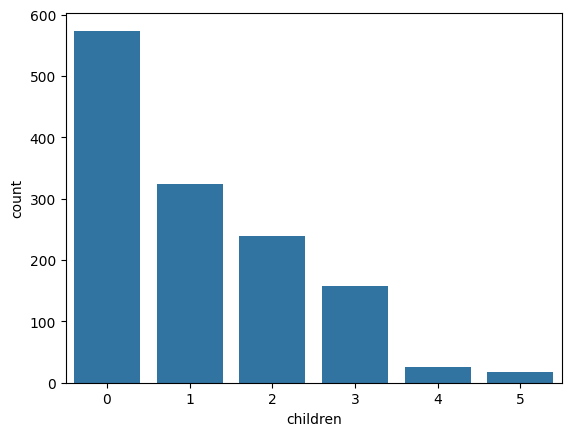

In [ ]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

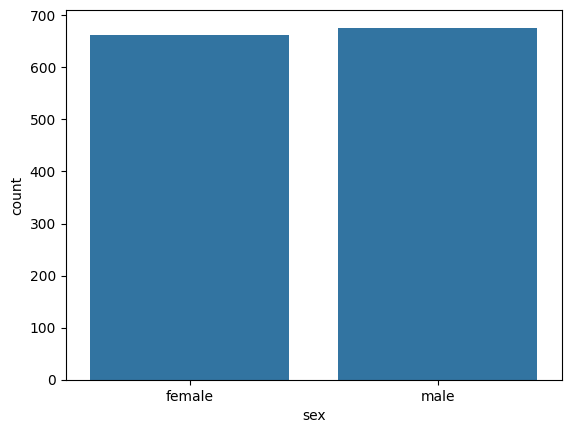

In [ ]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

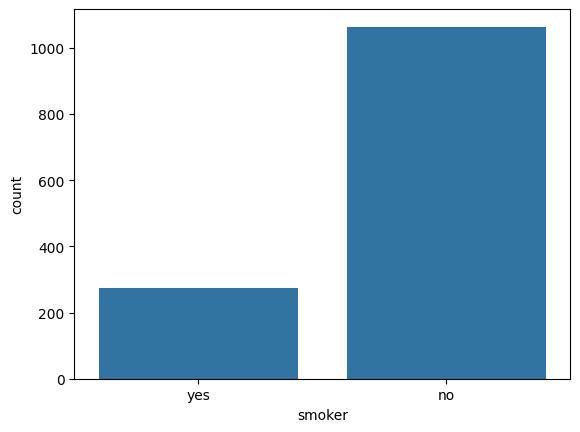

In [ ]:
sns.countplot(x=df['smoker'])

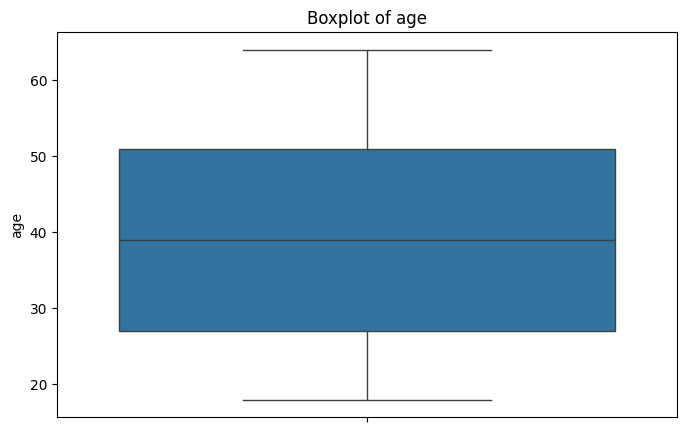

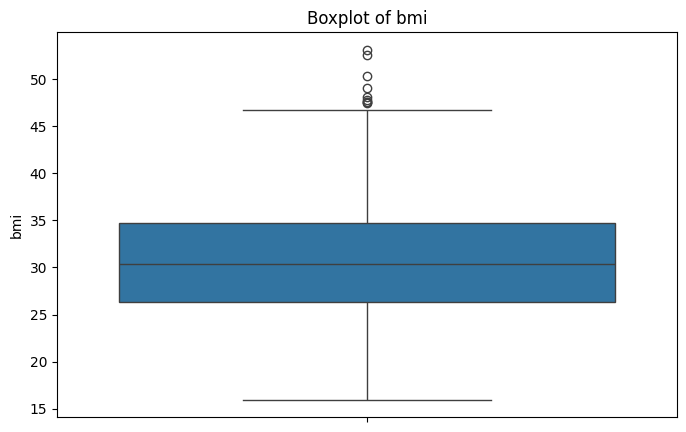

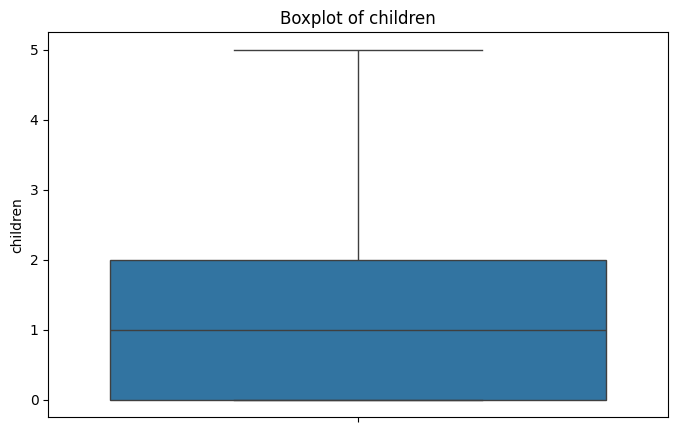

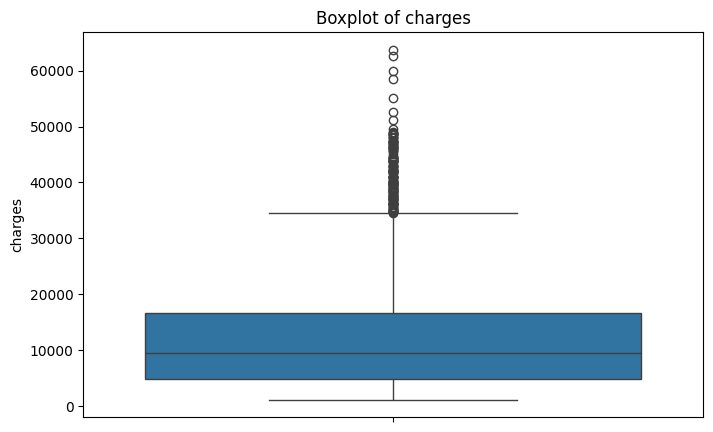

In [ ]:
#To check the distribution of data
for col in numeric_columns:
  plt.figure(figsize=(8,5))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

From above viz we conclude that bmi and children havenormal distribution , so they dont have outliers, but charges, bmi has outliers

<Axes: >

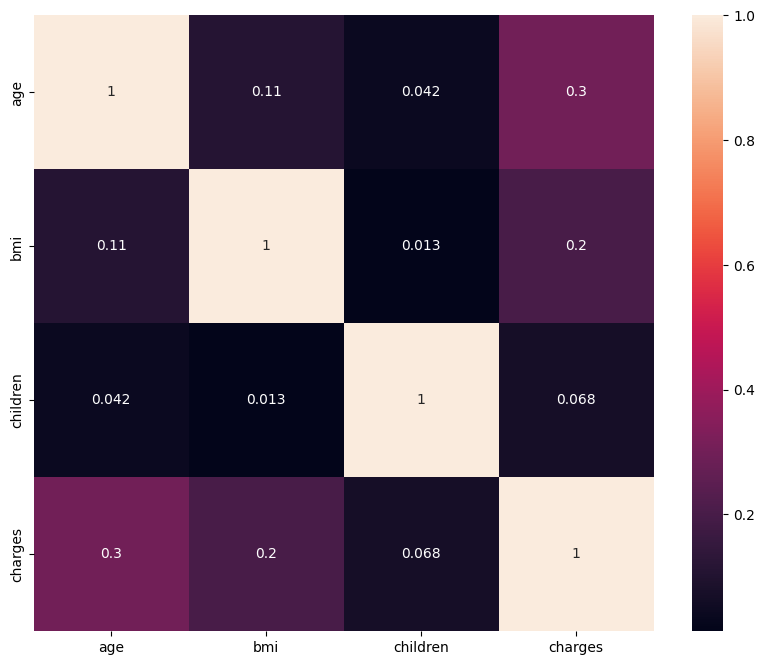

In [ ]:
# TO check the correlation of numerical columns

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_columns].corr(),annot=True) #Annot data show

#Heatmap is best to check correlation among different numerical columns

STEP 2- DATA CLEANING AND PREPROCESSING

In [ ]:
df_cleaned=df.copy() #WE copied all dataset in a new variable
df_cleaned.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_cleaned.shape

(1338, 7)

In [ ]:
#To remove Duplicates

df_cleaned.drop_duplicates(inplace=True)
df_cleaned.shape

(1337, 7)

In [ ]:
df_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
print(df_cleaned['sex'].value_counts())
df_cleaned['smoker'].value_counts()

#Why we do value counts ?
#Ans- if there is Male and male written in gender, it is treated separeately

sex
male      675
female    662
Name: count, dtype: int64


,count
smoker,
no,1063
yes,274


Now we will convert categorical columns into numerical columns , like we will encode this in 0 and 1, columns like sex, region, smoker

LABEL ENCODING

In [ ]:
df_cleaned['sex']=df_cleaned['sex'].map({'male':0,'female':1})
df_cleaned['smoker']=df_cleaned['smoker'].map({'yes':1,'no':0})

In [ ]:
df_cleaned.head()
#Now it has convertes sex and smoker in  0 and 1

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [ ]:
#Now to rename cols sex and smoker

df_cleaned.rename(columns={'sex':'is_female', 'smoker':'is_smoker'}, inplace=True)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


Now for sex(Male & Female) and smoker (yes & No) we had only two option so we assigned 0 and 1(LABEL ENCODING), but for region now we have multiple option(N,S,E,W), we cant assign 0 and 1 on a single column

Now for that we will do HOT ENCODING

ONE HOT ENCODING

In [ ]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [ ]:
# Now perform one-hot encoding on the 'region' column
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'], drop_first=True) #true does not consider existing column

display(df_cleaned.head())

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [ ]:
df_cleaned=df_cleaned.astype(int)

In [ ]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


FEATURE ENGINEERING AND EXTRACTION

In [ ]:
#Now from here hit and trial thing, like creating new column or deleting existing one

<Axes: xlabel='bmi', ylabel='Count'>

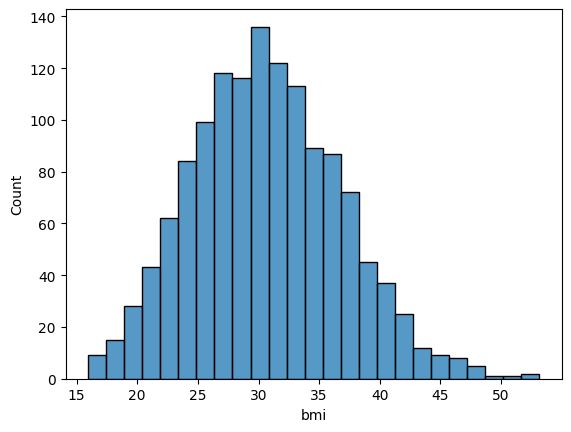

In [ ]:
sns.histplot(df['bmi'])

In [ ]:
df_cleaned['bmi_category']=pd.cut(df_cleaned['bmi'],bins=[0,18.5,24.9,29.9,100],labels=['underweight','healthy','overweight','obese'])
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,overweight
1,18,0,33,1,0,1725,0,1,0,obese
2,28,0,33,3,0,4449,0,1,0,obese
3,33,0,22,0,0,21984,1,0,0,healthy
4,32,0,28,0,0,3866,1,0,0,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,obese
1334,18,1,31,0,0,2205,0,0,0,obese
1335,18,1,36,0,0,1629,0,1,0,obese
1336,21,1,25,0,0,2007,0,0,1,overweight


In [ ]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)

In [ ]:
df_cleaned=df_cleaned.astype(int)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_healthy,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


In [ ]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_healthy', 'bmi_category_overweight',
       'bmi_category_obese'],
      dtype='object')

STANDARD SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
cols=['age', 'bmi', 'children']
scaler=StandardScaler()
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_healthy,bmi_category_overweight,bmi_category_obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,1,0,0,0,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,0,0,0,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,0,1,0,0,0,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0,1,0,1,0


Feature scaling is a data preprocessing technique used to standardize the range of independent variables or features of a dataset. In simpler terms, it's about changing the scale of the data to a common range without distorting the differences in the ranges of values.

In the code cell N_Sd7vHchm4f, you used StandardScaler from the sklearn.preprocessing module to scale the 'age', 'bmi', and 'children' columns:

from sklearn.preprocessing import StandardScaler
cols=['age', 'bmi', 'children']
scaler=StandardScaler()
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

df_cleaned
Here's a breakdown of the code:

from sklearn.preprocessing import StandardScaler: This line imports the StandardScaler class from scikit-learn's preprocessing module. StandardScaler is a common technique that standardizes features by removing the mean and scaling to unit variance.
cols=['age', 'bmi', 'children']: This line creates a list of the column names that you want to apply scaling to. These are typically the numerical columns in your dataset.
scaler=StandardScaler(): This line creates an instance of the StandardScaler.
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols]): This is the core of the scaling process.
scaler.fit_transform(df_cleaned[cols]): This method calculates the mean and standard deviation for each column specified in cols (fit) and then transforms the data in those columns using these calculated values (transform). The formula for standardization is: $$ z = \frac{(x - \mu)}{\sigma} $$$$ z = \frac{(x - \mu)}{\sigma} $$ where $x$$x$ is the original value, $\mu$$\mu$ is the mean, and $\sigma$$\sigma$ is the standard deviation.
df_cleaned[cols] = ...: This assigns the scaled values back to the specified columns in your df_cleaned DataFrame, overwriting the original values.
Why do we use feature scaling?

Many machine learning algorithms, especially those that rely on distance metrics (like K-Nearest Neighbors, Support Vector Machines, and K-Means Clustering) or gradient descent (like Linear Regression, Logistic Regression, and Neural Networks), are sensitive to the scale of the input features. If features have vastly different scales, the algorithm might be biased towards features with larger values, even if they are not more important.

Use cases of feature scaling:

Algorithms sensitive to feature scales: As mentioned above, algorithms that calculate distances or use gradient descent benefit significantly from feature scaling.
Improving convergence speed: For algorithms that use gradient descent, scaling can help the optimization process converge faster.
Preventing dominance of features with larger values: Scaling ensures that no single feature dominates the learning process simply because it has a larger numerical range.
In your case, scaling 'age', 'bmi', and 'children' helps to bring them to a similar scale, which can improve the performance of many machine learning models you might use later to predict insurance charges.

🔹 Why do we need Standard Scaling in ML?

Many ML algorithms compare distances between data points (like k-NN, SVM, logistic regression, neural networks).

If one feature has large values (e.g., income in lakhs), and another has small values (e.g., credit score between 300–900), the big numbers will dominate.

Scaling makes sure each feature contributes fairly to the model.

FEATURE EXTRACTION -- Extracting those column which are higly corelated on basis of my charges

In [ ]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_healthy', 'bmi_category_overweight',
       'bmi_category_obese'],
      dtype='object')

In [ ]:
from scipy.stats import pearsonr
#PEARSON CORRELATION CALCULATION
#LIST OF FEATURES TO CHECK AGAINST TARGET
selectted_features=[
    'age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_healthy', 'bmi_category_overweight',
       'bmi_category_obese'
]

correlations={
    feature:pearsonr(df_cleaned[feature],df_cleaned['charges'])[0]
    for feature in selectted_features
}

correlation_df=pd.DataFrame(list(correlations.items()),columns=['feature','correlation'])
correlation_df=correlation_df.sort_values(by='correlation',key=abs,ascending=False)
correlation_df

,feature,correlation
5,charges,1.000000
4,is_smoker,0.787234
0,age,0.298309
11,bmi_category_obese,0.200348
2,bmi,0.196236
10,bmi_category_overweight,-0.120601
9,bmi_category_healthy,-0.104042
7,region_southeast,0.073577
3,children,0.067390
1,is_female,-0.058046


In [ ]:


categorical_col=[
    'is_female', 'is_smoker', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_healthy', 'bmi_category_overweight',
       'bmi_category_obese'
]

In [ ]:
#CHI SQUARE TEST

from scipy.stats import chi2_contingency
import pandas as pd
alpha=0.05

categorical_col=[
    'is_female', 'is_smoker', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_healthy', 'bmi_category_overweight',
       'bmi_category_obese'
]

df_cleaned['charges_bin']=pd.qcut(df_cleaned['charges'], q=4 , labels=False)
chi2_results={}
for col in categorical_col:
  contingency_table=pd.crosstab(df_cleaned[col],df_cleaned['charges_bin'])
  chi2,p_val,_,_=chi2_contingency(contingency_table)
  chi2_results[col]={'chi2_stat':chi2, 'p_value':p_val}
chi2_df=pd.DataFrame.from_dict(chi2_results,orient='index').reset_index()
chi2_df=chi2_df.rename(columns={'index':'feature'})

In [ ]:
alpha = 0.05
chi2_df['Decision'] = chi2_df['p_value'].apply(lambda p: 'Keep' if p < alpha else 'Drop')
display(chi2_df)

,feature,chi2_stat,p_value,Decision
0,is_female,10.258784,1.648974e-02,Keep
1,is_smoker,848.219178,1.507478e-183,Keep
2,region_northwest,1.134240,7.688154e-01,Drop
3,region_southeast,15.998167,1.134966e-03,Keep
4,region_southwest,5.091893,1.651906e-01,Drop
5,bmi_category_healthy,3.708088,2.947595e-01,Drop
6,bmi_category_overweight,4.251490,2.355571e-01,Drop
7,bmi_category_obese,8.515711,3.647336e-02,Keep
